In [62]:
import os 
import cv2
import numpy as np
import glob
from tqdm import tqdm
import scipy.io as sio

%matplotlib inline
import matplotlib.pyplot as plt 
import time
import random

from torchvision import transforms
from PIL import Image
from segmentron.utils.visualize import get_color_pallete
from segmentron.models.model_zoo import get_segmentation_model
from segmentron.utils.options import parse_args
from segmentron.utils.default_setup import default_setup
from segmentron.config import cfg


In [123]:
total_train_data = '/mnt/lustre/share_data/xieenze/xez_space/Text/total_text/Images/Train/'
total_train_gt = '/mnt/lustre/share_data/xieenze/xez_space/Text/total_text/Groundtruth/Polygon/Train/'

In [124]:
img_paths, gt_paths = [], []
for i in range(1, 501):
    img_path = 'img{}.jpg'.format(i)
    img_path = os.path.join(total_train_data, img_path)
    
    gt_path = 'poly_gt_img{}.mat'.format(i)
    gt_path = os.path.join(total_train_gt, gt_path)
    if os.path.exists(gt_path) and os.path.exists(img_path):
        img_paths.append(img_path)
        gt_paths.append(gt_path)

In [159]:
def parse_img_gt(img_path, gt_path):
    img = cv2.imread(img_path)
    data=sio.loadmat(gt_path)['polygt']
    boxes = []
    for d in data:
#         d = d.replace('\n','').split(',')
        _,xs,_,ys,text,_ = d
        if "#" in text:
            continue #过滤掉ignore的
        polygon_np = np.concatenate([xs,ys],0).transpose(1,0).astype('int32')
        x, y, w, h = cv2.boundingRect(polygon_np)
        boxes.append([x,y,x+w,y+h])
    return img,boxes
    

In [167]:
index = 5
img_path, gt_path = img_paths[index], gt_paths[index]

In [168]:
img,boxes = parse_img_gt(img_path, gt_path)

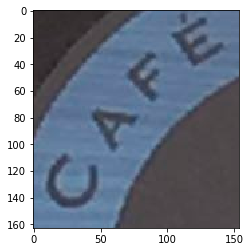

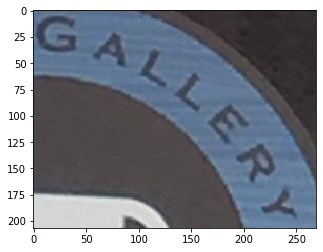

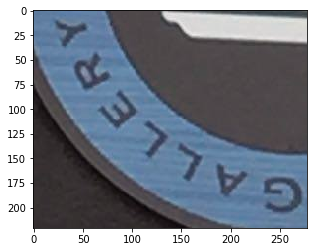

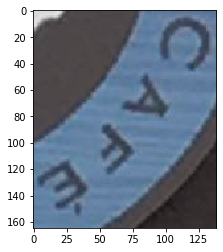

In [169]:
for box in boxes:
    x1,y1,x2,y2 = box
    patch = img[y1:y2+1,x1:x2+1]
    plt.imshow(patch)
    plt.show()